In [2]:
import pandas as pd
import numpy as np
################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#### Import Data

In [43]:
air_pollution = pd.read_excel(r'C:\Users\SAKET\Desktop\python\Machine Learning\Linear Regression\AirPollution.xls')
air_pollution

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
...,...,...,...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09,Bhosari,2004-09-01,Monsoon
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14,Bhosari,2004-09-08,Monsoon
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64,Bhosari,2004-09-15,Monsoon
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95,Bhosari,2004-09-22,Monsoon


#### Drop unwanted columns

In [44]:
air_pollution.drop(['Site','Date','Season'],inplace=True, axis=1)

In [45]:
air_pollution.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23


## Transformation method

In [46]:
log_air_pollution = np.sqrt(air_pollution)
log_air_pollution

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,10.986810,1.634013,0.100000,0.728011,0.781025,0.0,9.174421,6.353739
1,11.842719,1.868154,0.141421,0.316228,0.953939,0.0,9.423906,6.283311
2,10.344564,1.144552,0.100000,0.435890,0.692820,0.0,9.027181,6.949101
3,9.423906,0.871780,0.000000,0.574456,0.624500,0.0,7.861298,5.236411
4,8.663140,0.774597,0.000000,0.640312,1.240967,0.0,6.979255,4.385202
...,...,...,...,...,...,...,...,...
146,6.334824,0.316228,0.000000,0.200000,0.300000,0.0,4.345112,3.176476
147,6.354526,0.316228,0.000000,0.173205,0.300000,0.0,6.896376,4.913247
148,5.592853,0.331662,0.000000,0.141421,0.223607,0.0,5.615158,5.161395
149,7.218033,0.692820,0.000000,0.200000,0.244949,0.0,6.486910,4.790616


#### Data type

In [47]:
air_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    151 non-null    float64
 1   Pb      151 non-null    float64
 2   Cd      151 non-null    float64
 3   Cu      151 non-null    float64
 4   Cr      151 non-null    float64
 5   Zn      151 non-null    int64  
 6   NOx     151 non-null    float64
 7   SO2     151 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.6 KB


#### Univariate analysis

In [48]:
air_pollution.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.536026,0.716358,0.000265,0.331854,0.390066,0.0,42.692914,22.359868
std,40.908548,0.673069,0.001982,0.408259,0.434575,0.0,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.005000,0.220000,0.000000,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.610000,0.570000,0.000000,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.820000,0.965000,0.000000,0.535000,0.580000,0.0,54.695000,27.420000
max,194.740000,3.490000,0.020000,1.650000,3.220000,0.0,121.460000,53.270000


#### Check outliers

<AxesSubplot:>

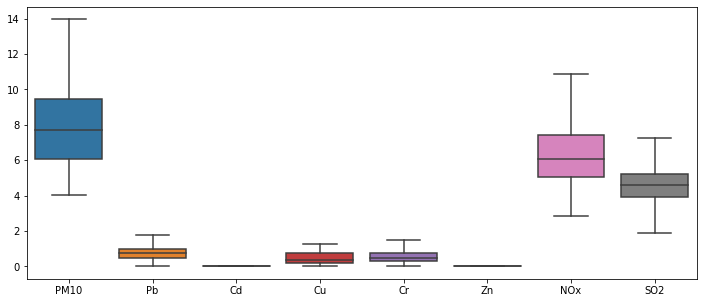

In [72]:
plt.rcParams["figure.figsize"] = [12,5]
sns.boxplot(data=log_air_pollution)

#### Treatment of outliers

In [50]:
def outlier_treatment(log_air_pollution):
    for s in log_air_pollution.columns:    
        q1=log_air_pollution[s].quantile(0.25)
        q3=log_air_pollution[s].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        if ((log_air_pollution[s].dtype=='int64') | (log_air_pollution[s].dtype=='float64')):
            log_air_pollution[s][log_air_pollution[s]<= lower_limit] = lower_limit
            log_air_pollution[s][log_air_pollution[s]>= upper_limit] = upper_limit
        else:
            log_air_pollution[s]=log_air_pollution[s]
    return log_air_pollution
outlier_treatment(log_air_pollution)

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,10.986810,1.634013,0.0,0.728011,0.781025,0.0,9.174421,6.353739
1,11.842719,1.752224,0.0,0.316228,0.953939,0.0,9.423906,6.283311
2,10.344564,1.144552,0.0,0.435890,0.692820,0.0,9.027181,6.949101
3,9.423906,0.871780,0.0,0.574456,0.624500,0.0,7.861298,5.236411
4,8.663140,0.774597,0.0,0.640312,1.240967,0.0,6.979255,4.385202
...,...,...,...,...,...,...,...,...
146,6.334824,0.316228,0.0,0.200000,0.300000,0.0,4.345112,3.176476
147,6.354526,0.316228,0.0,0.173205,0.300000,0.0,6.896376,4.913247
148,5.592853,0.331662,0.0,0.141421,0.223607,0.0,5.615158,5.161395
149,7.218033,0.692820,0.0,0.200000,0.244949,0.0,6.486910,4.790616


<AxesSubplot:>

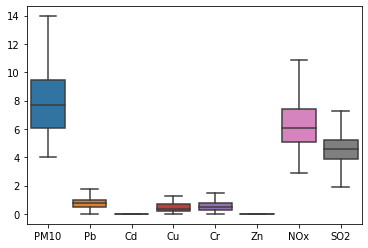

In [51]:
sns.boxplot(data=log_air_pollution)

#### Data Split

In [52]:
X=log_air_pollution.drop('PM10',axis=1)
y=log_air_pollution[['PM10']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=45)

In [53]:
df=pd.concat([X_train, y_train],axis=1)
df

,Pb,Cd,Cu,Cr,Zn,NOx,SO2,PM10
80,0.900000,0.0,0.911043,0.734847,0.0,6.284107,3.856164,9.008329
62,1.191638,0.0,0.331662,0.959166,0.0,9.784682,7.249692,12.405241
132,0.741620,0.0,0.648074,0.447214,0.0,5.330103,4.414748,6.500769
37,1.183216,0.0,1.135782,1.009950,0.0,8.013738,6.324555,12.445883
45,0.818535,0.0,0.447214,0.608276,0.0,5.168172,4.405678,8.487638
...,...,...,...,...,...,...,...,...
68,0.994987,0.0,0.300000,0.714143,0.0,8.894380,6.187891,9.585927
95,1.034408,0.0,0.529150,0.921954,0.0,5.419410,4.465423,11.003636
32,0.608276,0.0,0.412311,0.435890,0.0,6.538348,5.549775,6.105735
124,0.538516,0.0,0.447214,0.223607,0.0,5.316954,4.349713,5.925369


#### Correlation matrix

In [55]:
df.corr()

,Pb,Cd,Cu,Cr,Zn,NOx,SO2,PM10
Pb,1.000000,NaN,0.699073,0.826508,NaN,0.638605,0.576546,0.815012
Cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cu,0.699073,NaN,1.000000,0.829301,NaN,0.512419,0.470600,0.677206
Cr,0.826508,NaN,0.829301,1.000000,NaN,0.549942,0.556267,0.831390
Zn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOx,0.638605,NaN,0.512419,0.549942,NaN,1.000000,0.866400,0.604314
SO2,0.576546,NaN,0.470600,0.556267,NaN,0.866400,1.000000,0.575524
PM10,0.815012,NaN,0.677206,0.831390,NaN,0.604314,0.575524,1.000000


<AxesSubplot:>

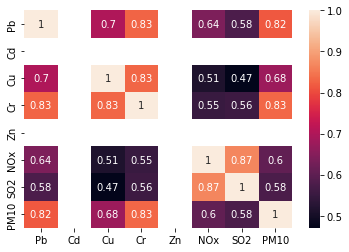

In [56]:
sns.heatmap(df.corr(),annot=True)

#### Multicolinearity doesnt exists in the data

<AxesSubplot:xlabel='Cr', ylabel='PM10'>

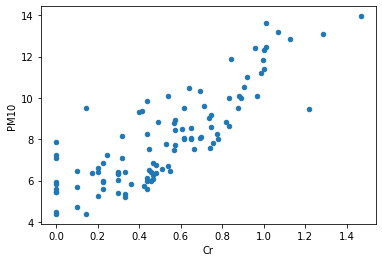

In [57]:
df.plot.scatter(x='Cr',y='PM10')

#### Cr have 83% strong positive corelation with PM10
Cr have high impact on PM10

#### Multicolinearity with VIF

In [58]:
X1=df.drop(['PM10'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

C:\Users\SAKET\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Pb     18.779970
Cd           NaN
Cu      8.630474
Cr     19.979029
Zn           NaN
NOx    72.882310
SO2    65.772371
dtype: float64

#### Colinearity exists in data

## Model Building 

#### Ho : There is linear relationship between PM10 and other independetnt variables
    Vs
H1 : There is no linear relationship between PM10 and other independent variables

In [59]:
import statsmodels.formula.api as smf
model=smf.ols('PM10 ~ Pb + Cd + Cu + Cr + Zn + NOx + SO2',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     60.57
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.37e-28
Time:                        16:17:03   Log-Likelihood:                -160.59
No. Observations:                 105   AIC:                             333.2
Df Residuals:                      99   BIC:                             349.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6110      0.493      7.318      0.000       2.632       4.590
Pb             1.9624      0.572      3.428      0.001       0.827       3.098
Cd          7.272e-16   1.68e-16      4.332      0.000    3.94e-16    1.06e-15
Cu            -0.4819      0.576     -0.837      0.405      -1.624       0.661
Cr             3.7891      0.813      4.663      0.000       2.177       5.402
Zn          3.525e-16   1.08e-16      3.272      0.001    1.39e-16    5.66e-16
NOx            0.1656      0.149      1.109      0.270      -0.131       0.462
SO2            0.0210      0.211      0.100      0.921      -0.397       0.439
==============================================================================
Omnibus:                        6.410   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.020
Skew:                           0.576   Prob(JB):                       0.0493
Kurtosis:                       3.224   Cond. No.                     1.11e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.59e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Pb, Cd, Cr, Zn has linear relationship with respect to PM10
* Cu, NOx, SO2 do not have linear relationship with respect to PM10,
  so we will remove them and rerun the model
* 75% is the accuracy of the model.

In [61]:
mode2=smf.ols('PM10 ~ Pb + Cr',data=df).fit()
mode2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     147.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           8.39e-31
Time:                        16:17:35   Log-Likelihood:                -162.85
No. Observations:                 105   AIC:                             331.7
Df Residuals:                     102   BIC:                             339.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3897      0.252     17.440      0.000       3.890       4.889
Pb             2.3798      0.526      4.523      0.000       1.336       3.423
Cr             3.4480      0.618      5.582      0.000       2.223       4.673
==============================================================================
Omnibus:                        4.758   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.621
Skew:                           0.513   Prob(JB):                       0.0992
Kurtosis:                       2.951   Cond. No.                         9.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Multicolinearity with VIF

In [62]:
X1=df.loc[:,['Pb','Cr']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

Pb    11.432609
Cr    11.432609
dtype: float64

Y= intercept + beta1 *b1+ bet2 * b2
Y= 26.4792 + 29.4896*Pb + 59.1507*Cr

In [63]:
df['fitted_value']=mode2.fittedvalues #Predicted Value
df['residual']=mode2.resid  #Error
df.head()

,Pb,Cd,Cu,Cr,Zn,NOx,SO2,PM10,fitted_value,residual
80,0.900000,0.0,0.911043,0.734847,0.0,6.284107,3.856164,9.008329,9.065316,-0.056986
62,1.191638,0.0,0.331662,0.959166,0.0,9.784682,7.249692,12.405241,10.532828,1.872413
132,0.741620,0.0,0.648074,0.447214,0.0,5.330103,4.414748,6.500769,7.696624,-1.195855
37,1.183216,0.0,1.135782,1.009950,0.0,8.013738,6.324555,12.445883,10.687892,1.757991
45,0.818535,0.0,0.447214,0.608276,0.0,5.168172,4.405678,8.487638,8.435022,0.052617


## Linearity 

<AxesSubplot:xlabel='Cr', ylabel='PM10'>

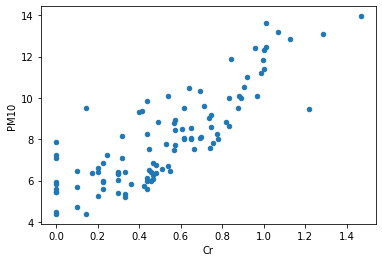

In [64]:
df.plot.scatter(x='Cr', y = 'PM10')

## Homoscedasity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

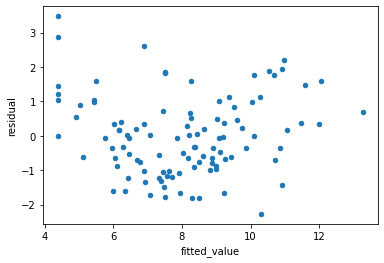

In [65]:
df.plot.scatter(x='fitted_value', y = 'residual')

## Normality

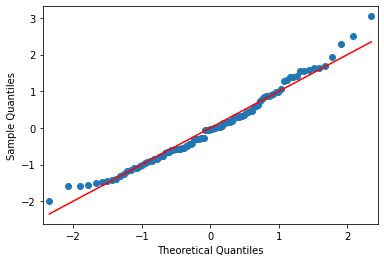

In [66]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

## Model error are IID 

<AxesSubplot:ylabel='Frequency'>

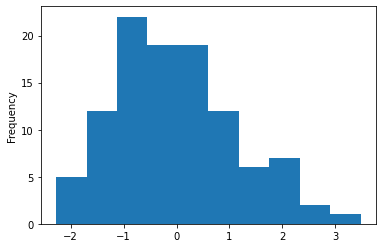

In [67]:
df['residual'].plot.hist()

## Predictions on test Data unseen data

In [68]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,Pb,Cd,Cu,Cr,Zn,NOx,SO2,PM10
0,1.634013,0.0,0.728011,0.781025,0.0,9.174421,6.353739,10.986810
43,0.670820,0.0,0.583095,0.648074,0.0,5.468089,4.502222,7.266361
130,0.282843,0.0,0.360555,0.264575,0.0,7.590125,4.745524,4.029888
3,0.871780,0.0,0.574456,0.624500,0.0,7.861298,5.236411,9.423906
34,0.374166,0.0,0.316228,0.000000,0.0,5.623166,4.185690,4.605432


In [69]:
df_test['Prediction']=mode2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Pb,Cd,Cu,Cr,Zn,NOx,SO2,PM10,Prediction
0,1.634013,0.0,0.728011,0.781025,0.0,9.174421,6.353739,10.986810,10.971369
43,0.670820,0.0,0.583095,0.648074,0.0,5.468089,4.502222,7.266361,8.220710
130,0.282843,0.0,0.360555,0.264575,0.0,7.590125,4.745524,4.029888,5.975065
3,0.871780,0.0,0.574456,0.624500,0.0,7.861298,5.236411,9.423906,8.617674
34,0.374166,0.0,0.316228,0.000000,0.0,5.623166,4.185690,4.605432,5.280132


## RMSE Train

In [70]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(df['PM10'],df['fitted_value'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 1.14


## RMSE Test data

In [71]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(df['PM10'],df['residual'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 8.24
